<center>
МІНІСТЕРСТВО ОСВІТИ І НАУКИ УКРАЇНИ

НАЦІОНАЛЬНИЙ ТЕХНІЧНИЙ УНІВЕРСИТЕТ УКРАЇНИ

«КИЇВСЬКИЙ ПОЛІТЕХНІЧНИЙ ІНСТИТУТ
імені ІГОРЯ СІКОРСЬКОГО»

Навчально-науковий інститут прикладного системного аналізу
Кафедра штучного інтелекту


Звіт

про виконання лабораторної роботи №1

з дисципліни «Інтелектуальний аналіз даних»



Виконали:

студент III курсу, груп КІ-33 та КІ-31
Тал Майк, Піддубна Марія, Владислав Дмитренко

Прийняв:
Викладач: Андросов Д.В.







Київ – 2025
</center>

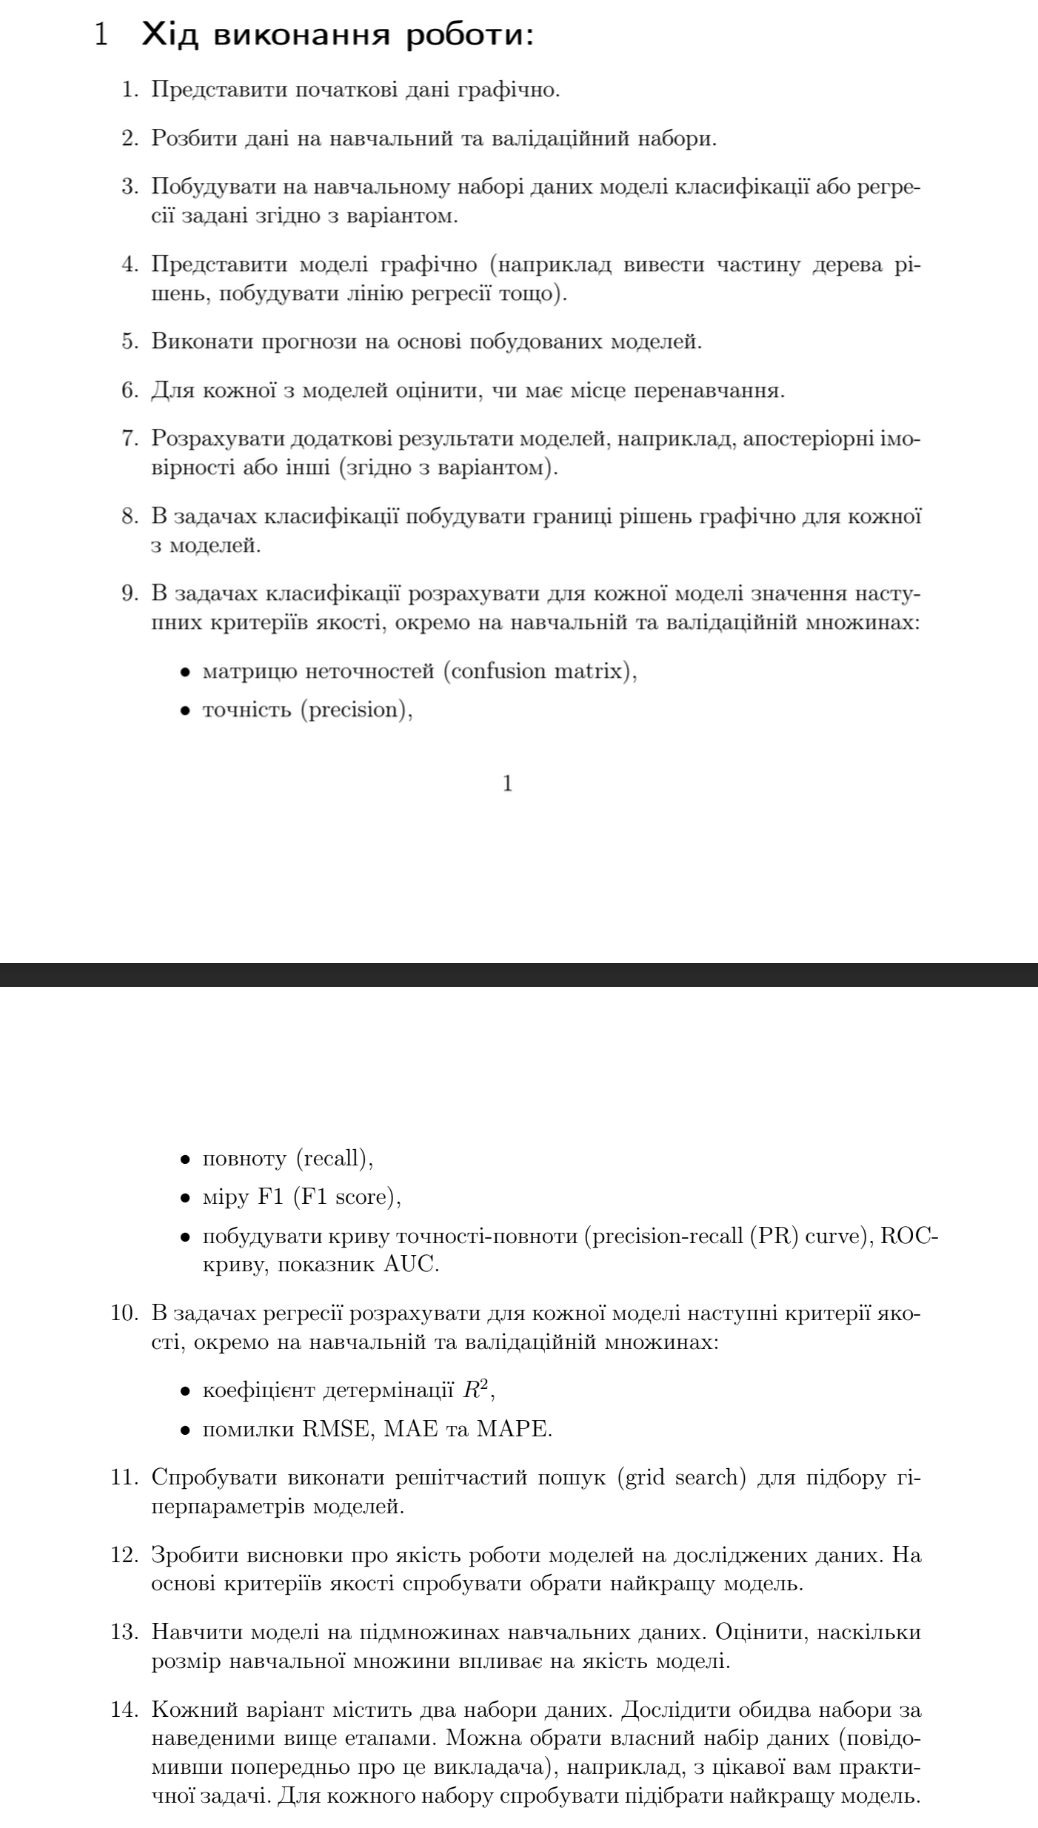

Варіант 14:
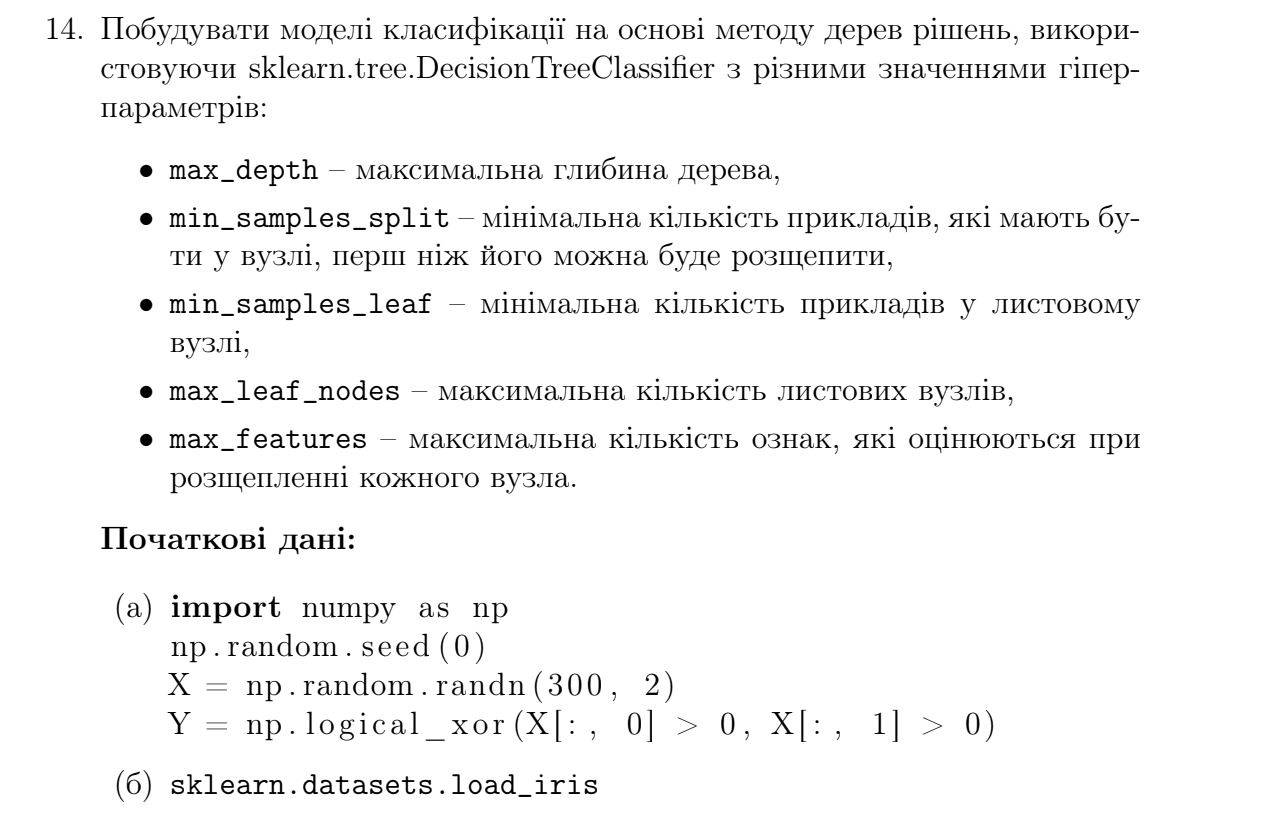

1. Представити початковi данi графiчно.

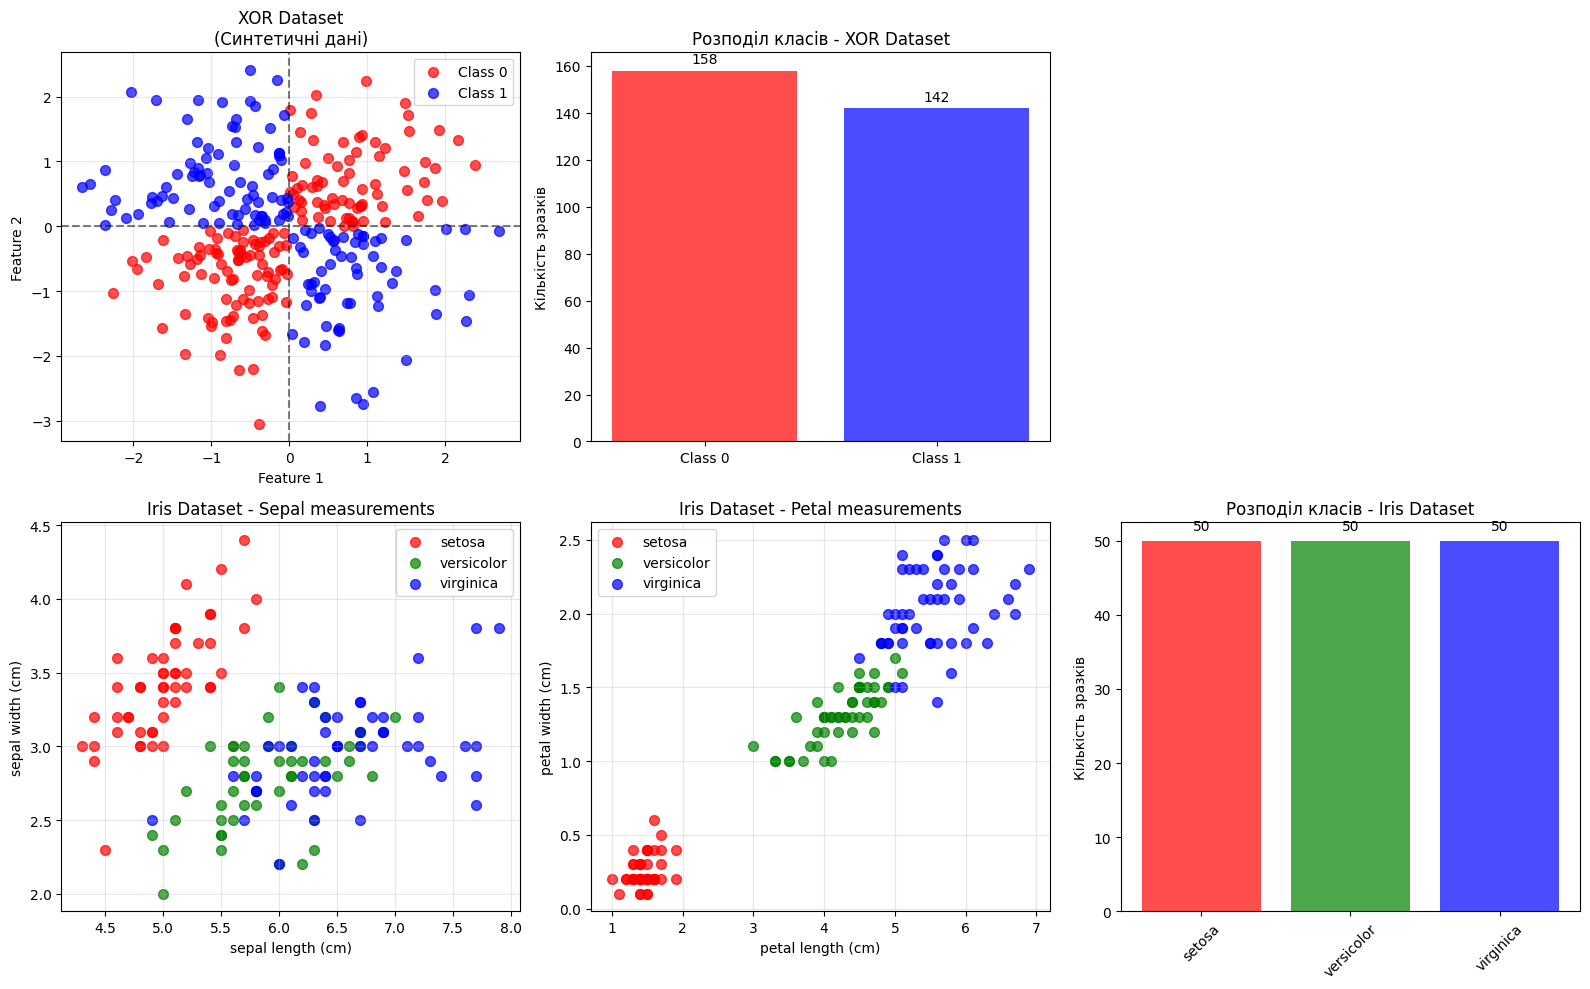

--- СТАТИСТИЧНА ІНФОРМАЦІЯ ---

1. XOR Dataset:
   - Розмір: (300, 2)
   - Кількість класів: 2
   - Розподіл класів: {np.False_: np.int64(158), np.True_: np.int64(142)}
   - Діапазон Feature 1: [-2.66, 2.70]
   - Діапазон Feature 2: [-3.05, 2.41]

2. Iris Dataset:
   - Розмір: (150, 4)
   - Кількість класів: 3
   - Класи: ['setosa' 'versicolor' 'virginica']
   - Розподіл класів: {np.str_('setosa'): np.int64(50), np.str_('versicolor'): np.int64(50), np.str_('virginica'): np.int64(50)}
   - Ознаки: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

3. Кореляційна матриця для Iris dataset:
                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)              1.000            -0.118              0.872   
sepal width (cm)              -0.118             1.000             -0.428   
petal length (cm)              0.872            -0.428              1.000   
petal width (cm)               0.818            -0.366           

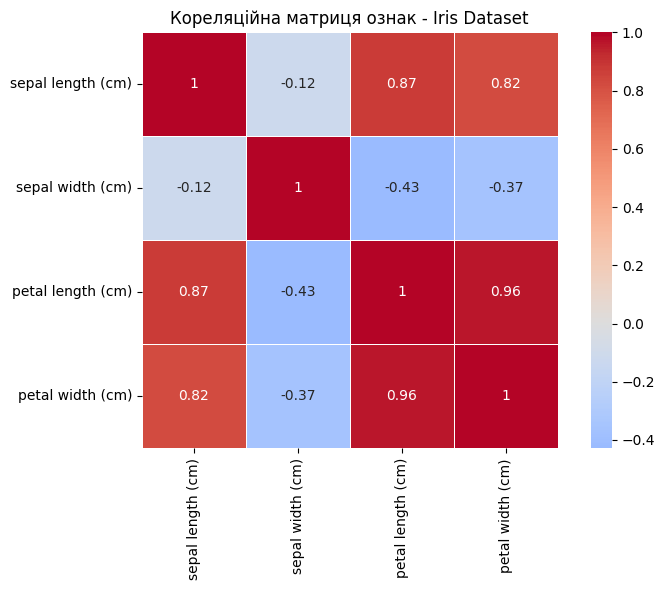

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import seaborn as sns

# Встановлюємо стиль для кращої візуалізації
plt.style.use('default')
sns.set_palette("husl")

# Початкові дані (а) - XOR dataset
np.random.seed(0)
X_xor = np.random.randn(300, 2)
Y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)

# Початкові дані (б) - Iris dataset
iris = load_iris()
X_iris = iris.data
Y_iris = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Створюємо фігуру з субплотами
fig = plt.figure(figsize=(16, 10))

# 1. Візуалізація XOR dataset
ax1 = plt.subplot(2, 3, 1)
colors_xor = ['red', 'blue']
for i in range(2):
    mask = Y_xor == i
    plt.scatter(X_xor[mask, 0], X_xor[mask, 1],
               c=colors_xor[i], alpha=0.7, s=50,
               label=f'Class {i}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('XOR Dataset\n(Синтетичні дані)')
plt.legend()
plt.grid(True, alpha=0.3)

# Додаємо лінії для візуалізації XOR логіки
plt.axhline(y=0, color='black', linestyle='--', alpha=0.5)
plt.axvline(x=0, color='black', linestyle='--', alpha=0.5)

# 2. Розподіл класів для XOR
ax2 = plt.subplot(2, 3, 2)
unique, counts = np.unique(Y_xor, return_counts=True)
plt.bar(['Class 0', 'Class 1'], counts, color=['red', 'blue'], alpha=0.7)
plt.title('Розподіл класів - XOR Dataset')
plt.ylabel('Кількість зразків')
for i, count in enumerate(counts):
    plt.text(i, count + 2, str(count), ha='center', va='bottom')

# 3. Iris dataset - Sepal measurements
ax3 = plt.subplot(2, 3, 4)
colors_iris = ['red', 'green', 'blue']
for i in range(3):
    mask = Y_iris == i
    plt.scatter(X_iris[mask, 0], X_iris[mask, 1],
               c=colors_iris[i], alpha=0.7, s=50,
               label=target_names[i])
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title('Iris Dataset - Sepal measurements')
plt.legend()
plt.grid(True, alpha=0.3)

# 4. Iris dataset - Petal measurements
ax4 = plt.subplot(2, 3, 5)
for i in range(3):
    mask = Y_iris == i
    plt.scatter(X_iris[mask, 2], X_iris[mask, 3],
               c=colors_iris[i], alpha=0.7, s=50,
               label=target_names[i])
plt.xlabel(feature_names[2])
plt.ylabel(feature_names[3])
plt.title('Iris Dataset - Petal measurements')
plt.legend()
plt.grid(True, alpha=0.3)

# 5. Розподіл класів для Iris
ax5 = plt.subplot(2, 3, 6)
unique, counts = np.unique(Y_iris, return_counts=True)
plt.bar(target_names, counts, color=colors_iris, alpha=0.7)
plt.title('Розподіл класів - Iris Dataset')
plt.ylabel('Кількість зразків')
plt.xticks(rotation=45)
for i, count in enumerate(counts):
    plt.text(i, count + 1, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Виводимо статистичну інформацію
print("--- СТАТИСТИЧНА ІНФОРМАЦІЯ ---\n")

print("1. XOR Dataset:")
print(f"   - Розмір: {X_xor.shape}")
print(f"   - Кількість класів: {len(np.unique(Y_xor))}")
print(f"   - Розподіл класів: {dict(zip(*np.unique(Y_xor, return_counts=True)))}")
print(f"   - Діапазон Feature 1: [{X_xor[:, 0].min():.2f}, {X_xor[:, 0].max():.2f}]")
print(f"   - Діапазон Feature 2: [{X_xor[:, 1].min():.2f}, {X_xor[:, 1].max():.2f}]")

print("\n2. Iris Dataset:")
print(f"   - Розмір: {X_iris.shape}")
print(f"   - Кількість класів: {len(np.unique(Y_iris))}")
print(f"   - Класи: {target_names}")
print(f"   - Розподіл класів: {dict(zip(target_names, np.bincount(Y_iris)))}")
print(f"   - Ознаки: {feature_names}")

# Кореляційна матриця для Iris dataset
print("\n3. Кореляційна матриця для Iris dataset:")
import pandas as pd
iris_df = pd.DataFrame(X_iris, columns=feature_names)
correlation_matrix = iris_df.corr()
print(correlation_matrix.round(3))

# Додаткова візуалізація кореляційної матриці
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5)
plt.title('Кореляційна матриця ознак - Iris Dataset')
plt.tight_layout()
plt.show()

2. Розбити данi на навчальний та валiдацiйний набори.

Використано statify для більш рівномірного розбиття. Розмір валідаційної вибірки 30%.

In [25]:
# 2. Розбиття даних на навчальний та валідаційний набори
from sklearn.model_selection import train_test_split

# Розбиття XOR dataset
X_xor_train, X_xor_val, Y_xor_train, Y_xor_val = train_test_split(
    X_xor, Y_xor, test_size=0.3, random_state=42, stratify=Y_xor
)

# Розбиття Iris dataset
X_iris_train, X_iris_val, Y_iris_train, Y_iris_val = train_test_split(
    X_iris, Y_iris, test_size=0.3, random_state=42, stratify=Y_iris
)

# Інформація про розбиття
print("XOR Dataset:")
print(f"  Навчальний: {X_xor_train.shape[0]} зразків")
print(f"  Валідаційний: {X_xor_val.shape[0]} зразків")

print("\nIris Dataset:")
print(f"  Навчальний: {X_iris_train.shape[0]} зразків")
print(f"  Валідаційний: {X_iris_val.shape[0]} зразків")

XOR Dataset:
  Навчальний: 210 зразків
  Валідаційний: 90 зразків

Iris Dataset:
  Навчальний: 105 зразків
  Валідаційний: 45 зразків


3. Побудувати на навчальному наборi даних моделi класифiкацiї або регресiї заданi згiдно з варiантом.

    Початкові параметри обираємо задля наявності порівняння. Далі будемо шукати оптимальні в відповідному пункті.

In [26]:
from sklearn.tree import DecisionTreeClassifier

# Визначаємо набори гіперпараметрів для тестування
hyperparameters = [
    {'max_depth': 3, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_leaf_nodes': None, 'max_features': None},
    {'max_depth': 5, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_leaf_nodes': 10, 'max_features': 'sqrt'},
    {'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_leaf_nodes': 20, 'max_features': 'log2'},
    {'max_depth': None, 'min_samples_split': 20, 'min_samples_leaf': 10, 'max_leaf_nodes': None, 'max_features': None},
    {'max_depth': 7, 'min_samples_split': 15, 'min_samples_leaf': 3, 'max_leaf_nodes': 15, 'max_features': 1}
]

# Створюємо та навчаємо моделі для XOR dataset
print("--- МОДЕЛІ ДЛЯ XOR DATASET ---")
xor_models = []

for i, params in enumerate(hyperparameters, 1):
    model = DecisionTreeClassifier(random_state=42, **params)
    model.fit(X_xor_train, Y_xor_train)
    xor_models.append(model)

    print(f"Модель {i}: {params}")
    print(f"  Навчена на {X_xor_train.shape[0]} зразках")

# Створюємо та навчаємо моделі для Iris dataset
print("\n--- МОДЕЛІ ДЛЯ IRIS DATASET ---")
iris_models = []

for i, params in enumerate(hyperparameters, 1):
    model = DecisionTreeClassifier(random_state=42, **params)
    model.fit(X_iris_train, Y_iris_train)
    iris_models.append(model)

    print(f"Модель {i}: {params}")
    print(f"  Навчена на {X_iris_train.shape[0]} зразках")

--- МОДЕЛІ ДЛЯ XOR DATASET ---
Модель 1: {'max_depth': 3, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_leaf_nodes': None, 'max_features': None}
  Навчена на 210 зразках
Модель 2: {'max_depth': 5, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_leaf_nodes': 10, 'max_features': 'sqrt'}
  Навчена на 210 зразках
Модель 3: {'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_leaf_nodes': 20, 'max_features': 'log2'}
  Навчена на 210 зразках
Модель 4: {'max_depth': None, 'min_samples_split': 20, 'min_samples_leaf': 10, 'max_leaf_nodes': None, 'max_features': None}
  Навчена на 210 зразках
Модель 5: {'max_depth': 7, 'min_samples_split': 15, 'min_samples_leaf': 3, 'max_leaf_nodes': 15, 'max_features': 1}
  Навчена на 210 зразках

--- МОДЕЛІ ДЛЯ IRIS DATASET ---
Модель 1: {'max_depth': 3, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_leaf_nodes': None, 'max_features': None}
  Навчена на 105 зразках
Модель 2: {'max_depth': 5, 'min_samples_split': 5, 'min_samples

4. Представити моделi графiчно (наприклад вивести частину дерева рi-
шень, побудувати лiнiю регресiї тощо).

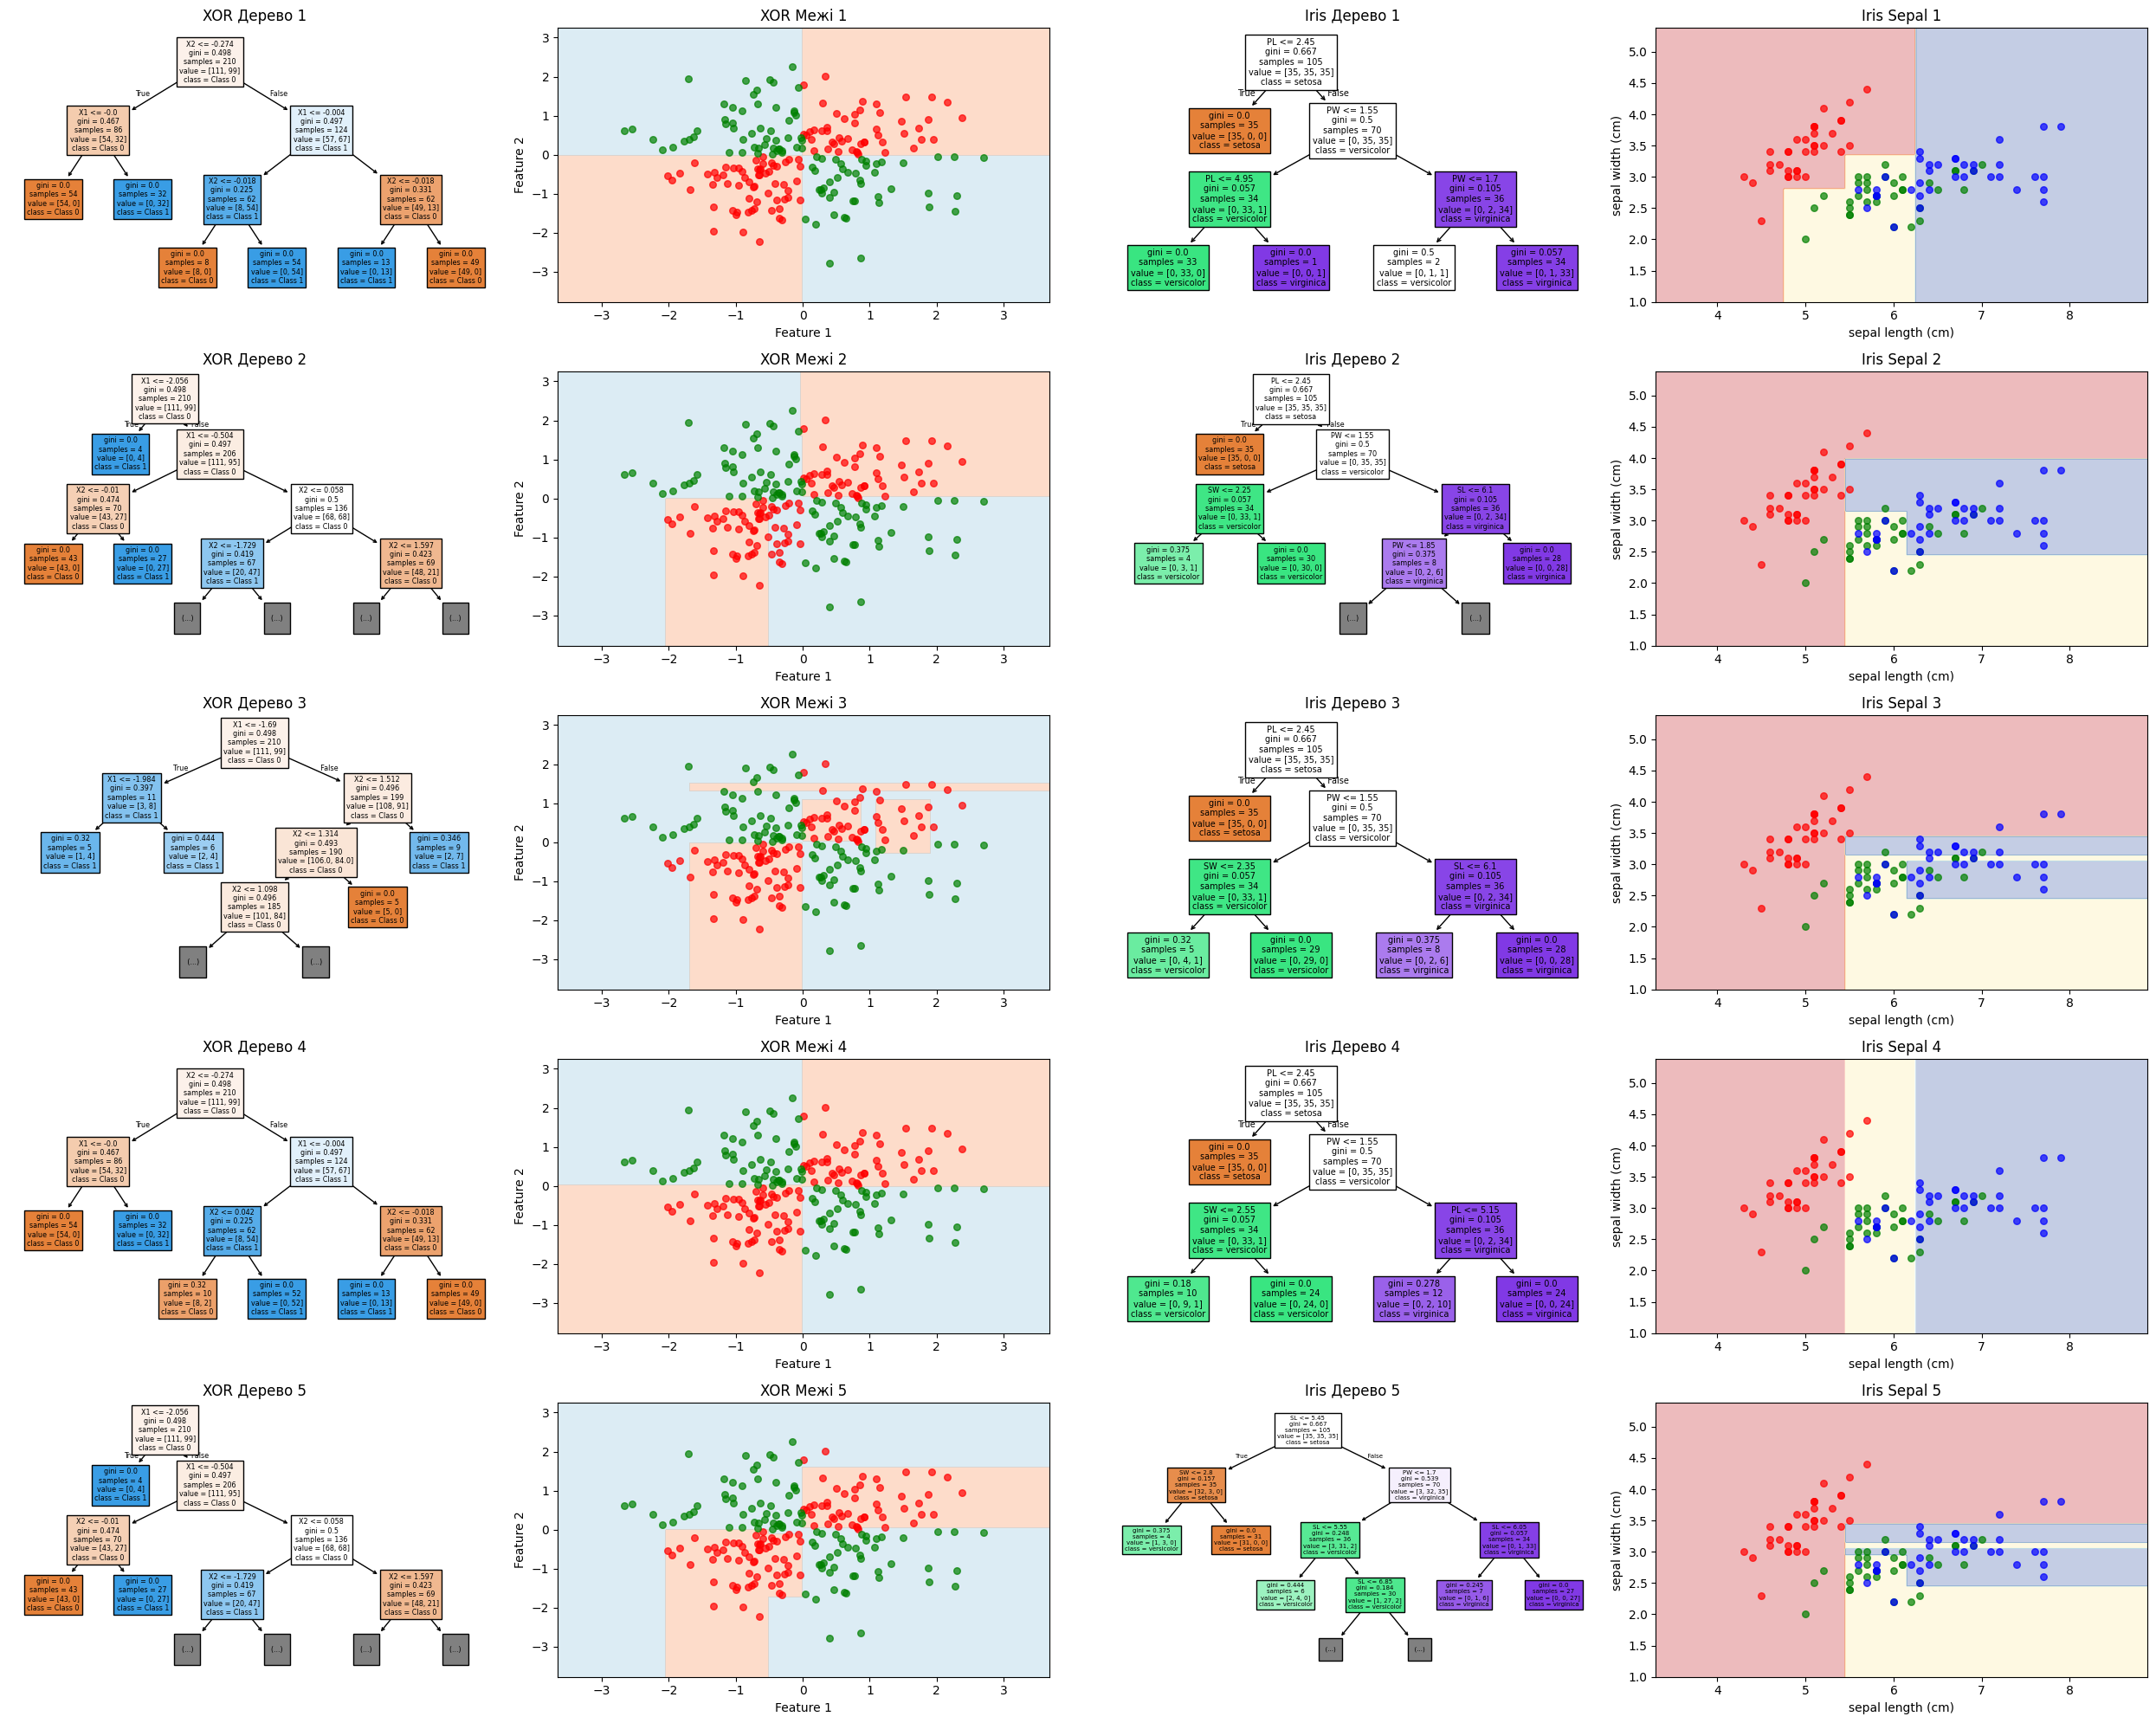

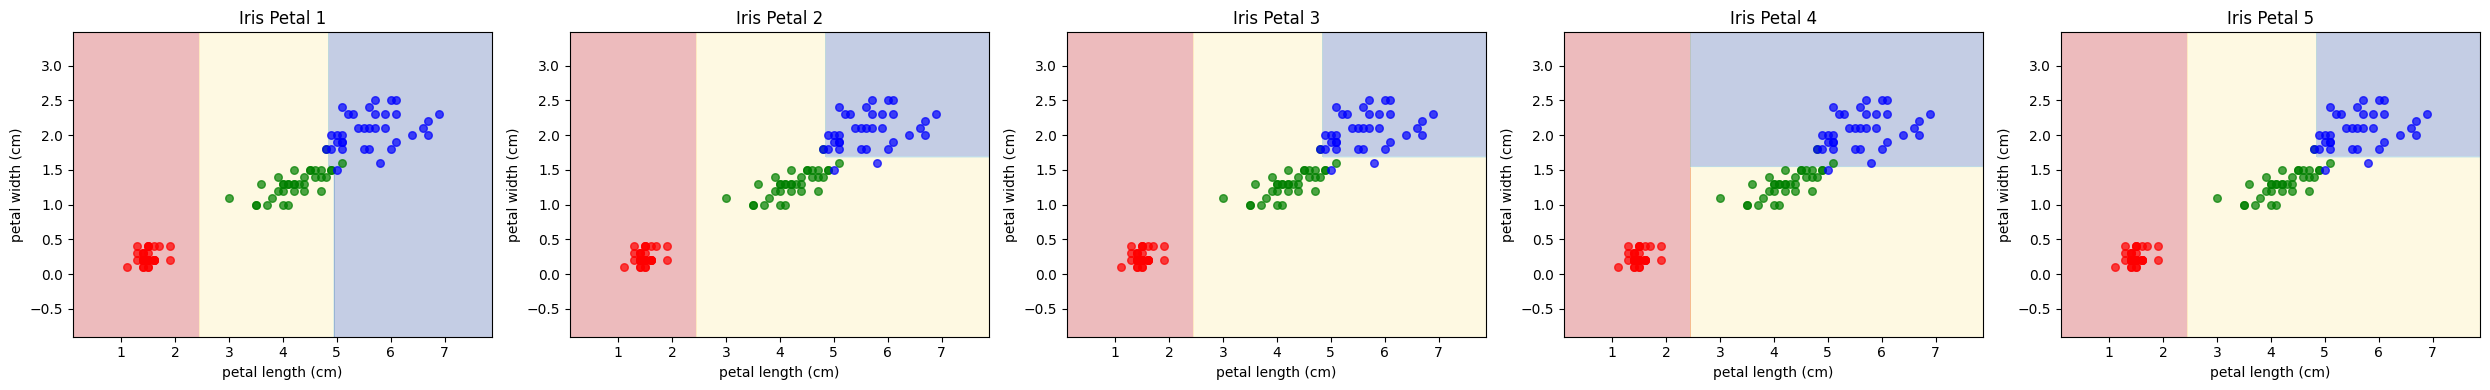

In [27]:
def plot_decision_boundary(model, X, Y, ax, title, feature_names=None):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.3, cmap='RdYlBu')

    colors = ['red', 'green', 'blue']
    for i in range(len(np.unique(Y))):
        mask = Y == i
        ax.scatter(X[mask, 0], X[mask, 1], c=colors[i], alpha=0.7, s=30)

    ax.set_title(title)
    if feature_names:
        ax.set_xlabel(feature_names[0])
        ax.set_ylabel(feature_names[1])

# Створюємо спрощені моделі для візуалізації меж (тільки 2 ознаки)
iris_sepal_models = []
iris_petal_models = []

for params in hyperparameters:
    # Модель для sepal measurements
    model_sepal = DecisionTreeClassifier(random_state=42, **params)
    model_sepal.fit(X_iris_train[:, :2], Y_iris_train)
    iris_sepal_models.append(model_sepal)

    # Модель для petal measurements
    model_petal = DecisionTreeClassifier(random_state=42, **params)
    model_petal.fit(X_iris_train[:, 2:], Y_iris_train)
    iris_petal_models.append(model_petal)

# Візуалізація дерев рішень - ВСІ 5 МОДЕЛЕЙ
fig = plt.figure(figsize=(25, 20))

for i in range(5):  # ВСІ 5 МОДЕЛЕЙ
    # XOR дерево
    ax = plt.subplot(5, 4, i*4 + 1)  # 5 рядків
    plot_tree(xor_models[i], max_depth=3, filled=True, feature_names=['X1', 'X2'],
              class_names=['Class 0', 'Class 1'], ax=ax)
    ax.set_title(f'XOR Дерево {i+1}')

    # XOR межі рішень
    ax = plt.subplot(5, 4, i*4 + 2)  # 5 рядків
    plot_decision_boundary(xor_models[i], X_xor_train, Y_xor_train, ax,
                          f'XOR Межі {i+1}', ['Feature 1', 'Feature 2'])

    # Iris дерево
    ax = plt.subplot(5, 4, i*4 + 3)  # 5 рядків
    plot_tree(iris_models[i], max_depth=3, filled=True,
              feature_names=['SL', 'SW', 'PL', 'PW'],
              class_names=target_names, ax=ax)
    ax.set_title(f'Iris Дерево {i+1}')

    # Iris межі рішень (sepal measurements)
    ax = plt.subplot(5, 4, i*4 + 4)  # 5 рядків
    plot_decision_boundary(iris_sepal_models[i], X_iris_train[:, :2], Y_iris_train, ax,
                          f'Iris Sepal {i+1}', [feature_names[0], feature_names[1]])

plt.tight_layout()
plt.show()

# Додаткова візуалізація для Iris (petal measurements) - ВСІ 5 МОДЕЛЕЙ
fig, axes = plt.subplots(1, 5, figsize=(25, 4))  # 5 колонок

for i in range(5):  # ВСІ 5 МОДЕЛЕЙ
    plot_decision_boundary(iris_petal_models[i], X_iris_train[:, 2:], Y_iris_train, axes[i],
                          f'Iris Petal {i+1}', [feature_names[2], feature_names[3]])

plt.tight_layout()
plt.show()

5. Виконати прогнози на основi побудованих моделей.

In [28]:
# 5. Виконання прогнозів на основі побудованих моделей
from sklearn.metrics import accuracy_score

# Прогнози для XOR dataset
print("--- ПРОГНОЗИ ДЛЯ XOR DATASET ---")
xor_predictions = []

for i, model in enumerate(xor_models, 1):
    pred = model.predict(X_xor_val)
    xor_predictions.append(pred)
    accuracy = accuracy_score(Y_xor_val, pred)

    class_0_count = int(np.sum(pred == False))
    class_1_count = int(np.sum(pred == True))

    print(f"Модель {i}: Точність = {accuracy:.3f}")
    print(f"  Class 0: {class_0_count} | Class 1: {class_1_count}")

# Прогнози для Iris dataset
print(f"\n--- ПРОГНОЗИ ДЛЯ IRIS DATASET ---")
iris_predictions = []

for i, model in enumerate(iris_models, 1):
    pred = model.predict(X_iris_val)
    iris_predictions.append(pred)
    accuracy = accuracy_score(Y_iris_val, pred)

    setosa_count = int(np.sum(pred == 0))
    versicolor_count = int(np.sum(pred == 1))
    virginica_count = int(np.sum(pred == 2))

    print(f"Модель {i}: Точність = {accuracy:.3f}")
    print(f"  setosa: {setosa_count} | versicolor: {versicolor_count} | virginica: {virginica_count}")

--- ПРОГНОЗИ ДЛЯ XOR DATASET ---
Модель 1: Точність = 1.000
  Class 0: 47 | Class 1: 43
Модель 2: Точність = 0.844
  Class 0: 33 | Class 1: 57
Модель 3: Точність = 0.878
  Class 0: 36 | Class 1: 54
Модель 4: Точність = 0.989
  Class 0: 48 | Class 1: 42
Модель 5: Точність = 0.911
  Class 0: 39 | Class 1: 51

--- ПРОГНОЗИ ДЛЯ IRIS DATASET ---
Модель 1: Точність = 0.978
  setosa: 15 | versicolor: 14 | virginica: 16
Модель 2: Точність = 0.844
  setosa: 15 | versicolor: 18 | virginica: 12
Модель 3: Точність = 0.889
  setosa: 15 | versicolor: 14 | virginica: 16
Модель 4: Точність = 0.889
  setosa: 15 | versicolor: 14 | virginica: 16
Модель 5: Точність = 0.844
  setosa: 14 | versicolor: 18 | virginica: 13


Можемо побачити, що з наявних, найбільш точною на валідаційному сеті є перша модель: {'max_depth': 3, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_leaf_nodes': None, 'max_features': None}.

6. Для кожної з моделей оцiнити, чи має мiсце перенавчання.